# Projeto ICD 
## World press freedom score



### Participantes:
- CLEYDSON DE SOUZA FERREIRA JUNIOR
- FELIPE GONTIJO SIQUEIRA
- MARIANA DA SILVA MARTINS

### Perguntas:
1. A média de liberdade aumenta ou diminui conforme a segurança do país?
2. Como o fator econômico influencia o contexto sociocultural e o de segurança?
3. O quão relacionados estão os índices de contexto econômico e contexto político? São diretamente ou inversamente proporcionais?

### Observação:
- Após alguns testes do projeto, percebeu-se uma inversão dos valores da coluna 'Global Score 2022' que influenciava na análise, dito isso as alterações necessárias foram feitas para melhor analisar os dados ofertados.

In [ ]:
pip install --upgrade nbformat nbconvert notebook

# Medidas de centralidade:

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('World Press Freedom Score.csv')

df = df.set_index('Ranking')

# Inversão de coluna 'Global score 2022'

a = df.sort_values('Global Score 2022')

a = a['Global Score 2022'].reset_index()

a = a.drop(columns = 'Ranking')

a.index +=1


df['Global Score 2022'] = a
df

,Country,Political Context 2022,Economic Context 2022,Legal Framework 2022,Safety Score 2022,Sociocultural Context 2022,Abuse Score 2021,Underlying Situation Score 2021,Global Score 2022,Global Score 2021,Global Score 2020,Global Score 2019
Ranking,,,,,,,,,,,,
1,Norway,94.89,90.38,92.23,92.03,93.71,0.00,6.72,13.92,6.72,7.84,7.82
2,Denmark,94.34,83.67,89.18,92.97,91.17,0.00,8.57,19.62,8.57,8.13,9.87
3,Sweden,91.96,87.66,90.27,84.14,90.18,0.00,7.24,23.22,7.24,9.25,8.31
4,Estonia,91.11,81.97,87.87,93.20,90.00,0.00,15.25,25.01,15.25,12.61,12.27
5,Finland,90.40,82.03,86.64,92.26,90.77,0.00,6.99,25.03,6.99,7.93,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...
176,Myanmar,40.40,29.25,20.18,4.63,30.67,0.00,31.12,88.42,31.12,30.20,29.00
177,Turkmenistan,25.00,11.73,29.61,35.69,23.00,55.21,41.86,88.83,43.94,42.88,43.98
178,Iran,34.14,21.32,26.71,13.61,23.78,0.00,29.82,88.84,29.82,29.79,29.67


In [5]:
media = df.mean(numeric_only = True)
mediana = df.median(numeric_only = True)


dfmm = pd.DataFrame([media, mediana], index = ["Média", "Mediana"])

dfmm.T

,Média,Mediana
Political Context 2022,57.068667,55.820
Economic Context 2022,45.063556,42.365
Legal Framework 2022,62.634611,66.080
Safety Score 2022,60.402889,66.665
Sociocultural Context 2022,66.337056,68.900
Abuse Score 2021,20.800500,13.860
Underlying Situation Score 2021,34.603944,31.575
Global Score 2022,58.231389,59.145
Global Score 2021,35.081722,31.690
Global Score 2020,34.799722,31.050


# Medidas de dispersão:

In [6]:
variancia = df.var(numeric_only = True)
desvio_p = df.std(numeric_only = True)

ind = df.columns
dfvd = pd.DataFrame([variancia, desvio_p], index = ["Variância", "Desvio padrão"])

dfvd.T

,Variância,Desvio padrão
Political Context 2022,294.589080,17.163598
Economic Context 2022,277.868405,16.669385
Legal Framework 2022,326.952660,18.081832
Safety Score 2022,593.835741,24.368745
Sociocultural Context 2022,325.346363,18.037360
Abuse Score 2021,512.639632,22.641547
Underlying Situation Score 2021,247.895071,15.744684
Global Score 2022,296.610335,17.222379
Global Score 2021,250.620904,15.831011
Global Score 2020,245.998481,15.684339


# Possíveis boxplots de acordo com as variáveis:

### **Boxplot geral para todas as variáveis disponíveis:**

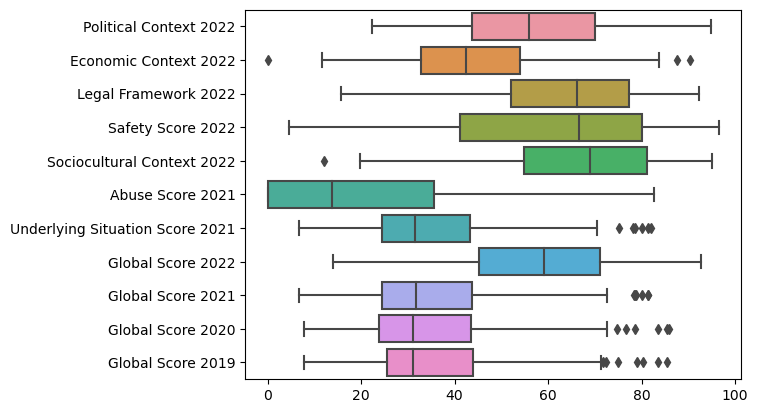

In [7]:
sns.boxplot(data=df, orient="h");

### Boxplots para a pergunta 1:
**A média de liberdade aumenta ou diminui conforme a segurança do país? (Apenas testes)**

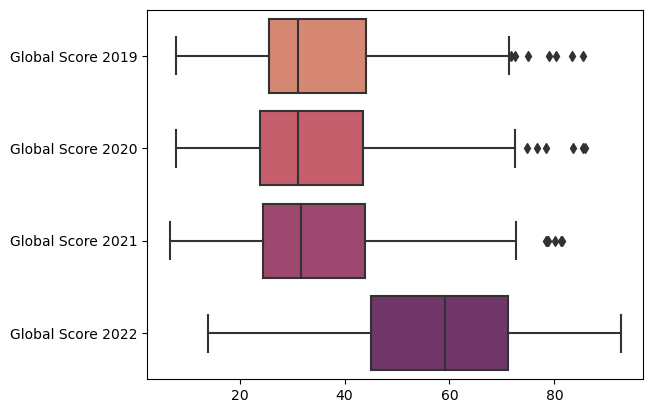

In [8]:
a = df[["Global Score 2019", "Global Score 2020", "Global Score 2021", "Global Score 2022"]]

sns.boxplot(data= a, orient = 'h', palette = 'flare');


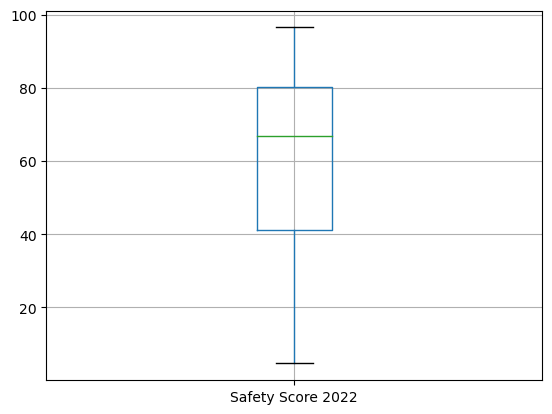

In [9]:
df.boxplot(column = ["Safety Score 2022"]);

### Boxplots para a pergunta 2:
**Como o fator econômico influencia o contexto sociocultural e o de segurança? (apenas testes)**

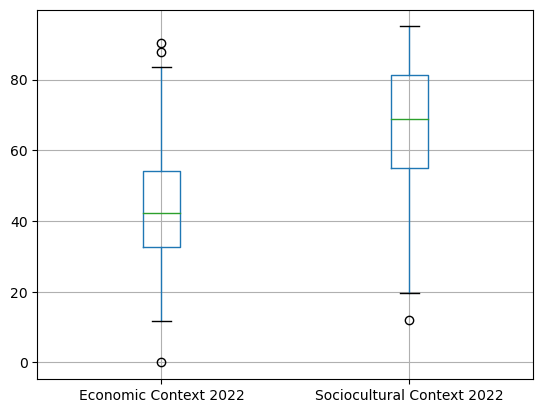

In [10]:
df.boxplot(column = ["Economic Context 2022", "Sociocultural Context 2022"]);

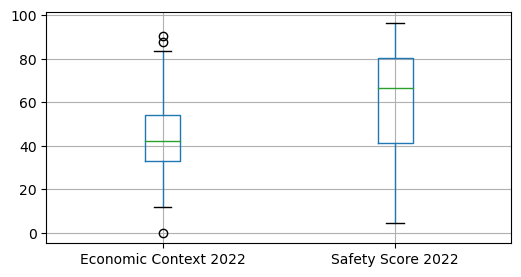

In [11]:
df.boxplot(column = ["Economic Context 2022", "Safety Score 2022"], figsize=(6,3));

### Boxplots para a pergunta 3:
**Qual país possui o pior contexto econômico juntamente com menor histórico de abuso? (apenas testes)**

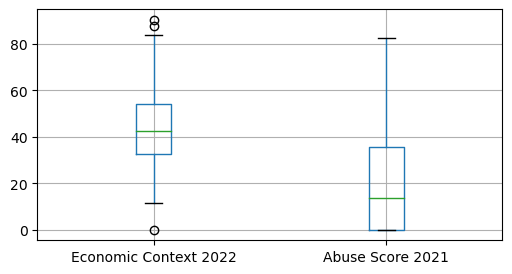

In [12]:
df.boxplot(column = ["Economic Context 2022", "Abuse Score 2021"], figsize=(6,3));